## Social Media Analytics

### Sentiment Analysis Best Buy
 Sentiment analysis, also known as opinion mining, is a field of natural language processing (NLP) that involves using computational techniques to determine the sentiment or subjective information conveyed in text. Its objective is to automatically identify and extract the emotional tone, attitude, or opinion present in various forms of text, such as reviews, social media posts, and customer feedback.

The primary goal of sentiment analysis is to categorize text into different sentiment polarities, typically positive, negative, or neutral. This analysis provides valuable insights to businesses and organizations regarding public opinion, customer feedback, brand perception, and market trends. By understanding the sentiment expressed in large volumes of text data, companies can make data-driven decisions, enhance their products or services, and improve customer experiences.

There are several approaches to sentiment analysis, ranging from rule-based methods to machine learning techniques. Rule-based methods involve creating predefined rules or patterns to identify sentiment-bearing words or phrases and assign sentiment scores accordingly. In contrast, machine learning approaches utilize algorithms to learn patterns and relationships from labeled training data, enabling the system to classify new, unseen text.

However, sentiment analysis faces challenges due to factors such as sarcasm, irony, context ambiguity, and language nuances. These linguistic subtleties make accurately interpreting sentiment more complex. Researchers and developers continuously strive to enhance sentiment analysis models by leveraging advanced techniques like deep learning, contextual word embeddings, and domain-specific training data.

Sentiment analysis finds applications across various industries. It is used for brand monitoring, reputation management, customer feedback analysis, social media sentiment tracking, market research, political analysis, and customer support optimization.

In summary, sentiment analysis is a valuable tool that enables businesses and organizations to gain insights from text data by automatically categorizing the sentiment expressed within it. In today's digital age, where vast amounts of textual information are generated daily, understanding the sentiment behind that information can provide a competitive advantage.

### Initial setup

In [1]:
# Import packages
import csv
import pandas as pd
import numpy as np
import nltk 
import re
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [2]:
dtypes = {
    'id': 'category',
    'device': 'category',
    'user': 'category',
    'rating': 'float64',
    'text': 'string',
    'data': 'category',
    'ownership_length': 'category',
}

ds = pd.read_excel(
    "ExtractedReviewsDatabb.xlsx",
    dtype=dtypes,
 )

In [3]:
# Check first rows
ds.head()

,ID,device,user,rating,text,date,ownership_length,pros_mentioned,cons_mentioned
0,0,Apple - iPhone 14 128GB - Midnight (Verizon),BigG,5.0,Apple makes the best cellphone on the market h...,2023-02-03,less than 1 week,Not specified,Not specified
1,1,Apple - iPhone 14 128GB - Midnight (Verizon),Jp44087,5.0,"Ease of use, good battery life, 128gb fits me ...",2023-02-03,3 weeks,"Battery life, Ease of use",Not specified
2,2,Apple - iPhone 14 128GB - Midnight (Verizon),GamerDadLife,5.0,Love it works great and the red color is the m...,2022-12-24,2 weeks,Color,Not specified
3,3,Apple - iPhone 14 128GB - Midnight (Verizon),LevanaP,5.0,Been a long time iPhone user. This is a awesom...,2023-04-14,1 week,Not specified,Not specified
4,4,Apple - iPhone 14 128GB - Midnight (Verizon),Anonymous,5.0,My wife dropped her phone right AFTER the Appl...,2023-04-15,3 weeks,Not specified,Not specified


### Functions

In [4]:
# Text preprocessing
def textPreProcess(rawText, removeHTML=True, charsToRemove = r'\?|\.|\!|\;|\.|\"|\,|\(|\)|\&|\:|\-', removeNumbers=True, removeLineBreaks=False, specialCharsToRemove = r'[^\x00-\xfd]', convertToLower=True, removeConsecutiveSpaces=True):
    if type(rawText) != str:
        return rawText
    procText = rawText
        
    # Remove HTML
    if removeHTML:
        procText = BeautifulSoup(procText,'html.parser').get_text()

    # Remove punctuation and other special characters
    if len(charsToRemove)>0:
        procText = re.sub(charsToRemove,' ',procText)

    # Remove numbers
    if removeNumbers:
        procText = re.sub(r'\d+',' ',procText)

    # Remove line breaks
    if removeLineBreaks:
        procText = procText.replace('\n',' ').replace('\r', '')

    # Remove special characters
    if len(specialCharsToRemove)>0:
        procText = re.sub(specialCharsToRemove,' ',procText)

    # Normalize to lower case
    if convertToLower:
        procText = procText.lower() 

    # Replace multiple consecutive spaces with just one space
    if removeConsecutiveSpaces:
        procText = re.sub(' +', ' ', procText)

    return procText

In [5]:
# Tokenize words
def tokenize_words(words):
    if (type(words) != str) or (word_tokenize(words) == ''):
        return np.nan
    else:
        return word_tokenize(words)

In [6]:
# Function to create text from words
def recreateText(words):
    if type(words) == list:
        temp_str = (' ').join(words)
        return temp_str
    else:
        return np.nan

In [7]:
# Function to break texts into sentences
def tokenize_sentences(texts):
    s_token = sent_tokenize(texts)
    return s_token

In [8]:
# Function to remove stop words
def removeStopWords(t, stop_words):
    if type(t) == list:
        return [w for w in t if not w in stop_words]
    else:
        return np.nan

### Analysis

In [9]:
def tokenize_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return ". ".join(sentences)

In [10]:
listOfSentences = ds.text.apply(tokenize_sentences)

In [11]:
# Create a dataframe with only the description
processedReviews = pd.DataFrame(data=ds.text.apply(textPreProcess,charsToRemove ='', removeLineBreaks=False, removeNumbers=False).values, index=ds.index, columns=['PreProcessedText'])

C:\Users\Adventure.4.Eva.r\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [12]:
# Check first review
ds.text[0]

'Apple makes the best cellphone on the market hands down'

In [13]:
# Sentences of first review
listOfSentences[0]

'Apple makes the best cellphone on the market hands down'

In [14]:
# Split sentences and count the number of sentences per review
reviews_str = ds['text'].astype(str)
sentences = pd.DataFrame(reviews_str.str.split('.').tolist(), index=ds['ID']).stack()
sentencesPerReview = [len(elem) for elem in reviews_str.str.split('.')]
 
# Create a new DataFrame with the sentences and their respective IDs
sentences.name = 'sentence'
sentences.index.names = ['ID', 'sentence_no']
sentences = sentences.reset_index().set_index('ID')

In [15]:
import re
import string

def text_preprocess(text):
    """
    Preprocess text data by converting to lowercase, removing punctuation and digits, and removing extra whitespaces.
    """
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Preprocess text 
sentences['PreProcessedText'] = sentences['sentence'].apply(text_preprocess)

In [16]:
# Get words
sentences['Words'] =  sentences['PreProcessedText'].apply(tokenize_words)

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adventure.4.Eva.r\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
sentences['WordsCleaned'] = sentences['Words'].apply(removeStopWords,stop_words=stop_words)

In [19]:
# Recreate sentence without stopwords
sentences['ProcessedText'] = sentences['WordsCleaned'].apply(recreateText)

In [20]:
# Create sentiment analysis object
analyser = SentimentIntensityAnalyzer()

In [21]:
# To test, let's evaluate first sentence of first review
# Scales:
#   compound: -1:most extreme negative, 1:most extreme positive
#     positive: compound >=0.05
#     neutral: -0.05<compound<0.05
#     negative: compound <= -0.05
#   pos, neu, neg: proportion of text that are positive, neutral or negative
score = analyser.polarity_scores(sentences['ProcessedText'][0])
print(sentences['ProcessedText'][0],score)

apple makes best cellphone market hands {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}


In [22]:
# Process sentiment for all sentences
all_scores = []
for t in (sentences['ProcessedText'][:]):
  score = analyser.polarity_scores(t)
  all_scores.append(score)
sentences['Sentiment'] = [c['compound'] for c in all_scores]

In [26]:
# Compute review's sentiment as the mean sentiment from its sentences
meanByReview = sentences.groupby('ID')['Sentiment'].mean()

# Consider sentences with no result as neutral (0)
meanByReview = meanByReview.fillna(0)

# Add column Sentiment to reviews Dataframe
ds['Sentiment'] = meanByReview[ds['ID']].values

In [28]:
bins = pd.IntervalIndex.from_tuples([(-1.1, -0.05), (-0.05, 0.05), (0.05, 1)], closed='right')
x = pd.cut(ds['Sentiment'].to_list(), bins)
x = x.set_categories(['Negative','Neutral','Positive'])
ds['Polarity'] = x

In [29]:
import pandas as pd

# Define the interval bins and categories
bins = pd.IntervalIndex.from_tuples([(-1.1, -0.05), (-0.05, 0.05), (0.05, 1)], closed='right')
categories = ['Negative', 'Neutral', 'Positive']

# Bin the 'Sentiment' column into the specified categories
ds['Polarity'] = pd.cut(ds['Sentiment'], bins=len(categories), labels=categories,right=False)

# Print the 'Polarity' column
print(ds['Polarity'])

0      Positive
1      Positive
2      Positive
3       Neutral
4       Neutral
         ...   
368     Neutral
369    Positive
370    Positive
371    Negative
372    Negative
Name: Polarity, Length: 373, dtype: category
Categories (3, object): ['Negative' < 'Neutral' < 'Positive']


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the categories
categories = ['Negative', 'Neutral', 'Positive']

# Bin the 'Sentiment' column into the specified categories
ds['Polarity'] = pd.cut(ds['Sentiment'], bins=len(categories), labels=categories, right=False)

# Calculate the polarity counts
polarity_counts = ds['Polarity'].value_counts()

In [31]:
polarity_counts

Polarity
Neutral     205
Positive     94
Negative     74
Name: count, dtype: int64

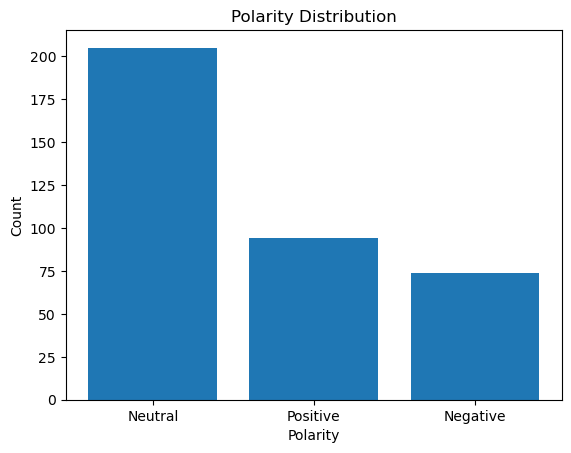

In [32]:
# Plot a bar chart of polarity counts
plt.bar(polarity_counts.index, polarity_counts.values)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')
plt.show()

This distribution of polarity categories provides an overview of the sentiment expressed in the reviews. It indicates that the majority of the reviews fall under the "Neutral" category, while a smaller number of reviews are classified as either "Positive" or "Negative". This distribution suggests a relatively balanced sentiment among the reviewers, with inclination towards neutrality.

In [33]:
# Analysis examples:
# Mean by hotel 
ex1 = ds.groupby('text')['Sentiment'].mean().to_frame()
ex1

,Sentiment
text,
100% love I love my item. THANKS BEST BUY!!!!!...,0.576833
A fantastic phone! Purchase and transfer was a...,0.432900
A must have for an upgrade. Bestbuy always has...,0.212300
A++++ love the camera and the sleek design. Fi...,0.473800
"Absolutely love it, took a bit of setup out of...",0.453050
...,...
new to Iphone - had a droid - so trying to nav...,0.077200
overall a good phone. battery life is great an...,0.532650
the phone is pretty - I just don't like when s...,0.199900


These sentiment scores represent the sentiment expressed in the corresponding titles. Positive sentiment scores indicate positive sentiment, while negative sentiment scores indicate negative sentiment. A sentiment score of 0 suggests a neutral sentiment.

These scores can be used to gauge the overall sentiment associated with each title. Titles with higher positive sentiment scores generally indicate positive experiences or opinions, while titles with negative sentiment scores may indicate negative experiences or issues. Titles with scores close to 0 suggest a neutral sentiment or mixed opinions.

It's important to note that the sentiment scores are numerical representations of sentiment and should be interpreted in the context of the specific analysis or application.

In [37]:
# Analysis examples:
# Mean by hotel stars and type
ex2 = ds[['ID','text','Sentiment']].groupby(['text'], as_index=False).mean()
ex2

,text,ID,Sentiment
0,100% love I love my item. THANKS BEST BUY!!!!!...,302.0,0.576833
1,A fantastic phone! Purchase and transfer was a...,158.0,0.432900
2,A must have for an upgrade. Bestbuy always has...,132.0,0.212300
3,A++++ love the camera and the sleek design. Fi...,227.0,0.473800
4,"Absolutely love it, took a bit of setup out of...",34.0,0.453050
...,...,...,...
364,new to Iphone - had a droid - so trying to nav...,11.0,0.077200
365,overall a good phone. battery life is great an...,340.0,0.532650
366,the phone is pretty - I just don't like when s...,8.0,0.199900
367,updated from a 6s -- while the 6s was still pe...,217.0,0.440400


The sentiment scores represent the sentiment expressed in each review. Positive sentiment scores indicate positive sentiment, negative scores indicate negative sentiment, and a score of 0 suggests a neutral sentiment.

These scores can be used to analyze the sentiment of the reviews. Higher positive sentiment scores indicate more positive opinions or experiences expressed in the review, while negative sentiment scores may indicate negative experiences or issues. Reviews with scores close to 0 suggest a neutral sentiment or mixed opinions.

It's important to note that the sentiment scores are numerical representations of sentiment and should be interpreted in the context of the specific analysis or application.

In [38]:
# Analysis examples:
# By title and polarity
ex3 = ds.groupby(['device', 'Polarity'])['Sentiment'].mean().to_frame()
ex3

Sentiment
device                                        Polarity           
Apple - iPhone 14 128GB - Midnight (AT&T)     Negative   0.038125
                                              Neutral    0.354841
                                              Positive   0.698296
Apple - iPhone 14 128GB - Midnight (Verizon)  Negative   0.020785
                                              Neutral    0.351317
                                              Positive   0.768759
Apple - iPhone 14 128GB - Purple (T-Mobile)   Negative   0.035446
                                              Neutral    0.344300
                                              Positive   0.781462
Apple - iPhone 14 256GB - Midnight (AT&T)     Negative   0.032530
                                              Neutral    0.409090
                                              Positive   0.772125
Apple - iPhone 14 256GB - Midnight (T-Mobile) Negative   0.096295
                                              Neutral    0.327379
                                              Positive   0.768933
Apple - iPhone 14 256GB - Purple (Verizon)    Negative   0.067651
                                              Neutral    0.330401
                                              Positive   0.859700
Apple - iPhone 14 512GB - Midnight (AT&T)     Negative        NaN
                                              Neutral    0.344650
                                              Positive        NaN
Apple - iPhone 14 512GB - Yellow (Verizon)    Negative   0.000000
                                              Neutral         NaN
                                              Positive        NaN

The sentiment scores for each polarity category (negative, neutral, positive) represent the sentiment expressed in the respective titles. Negative scores indicate negative sentiment, positive scores indicate positive sentiment, and NaN values indicate missing sentiment data.

These scores can be used to analyze the sentiment distribution across different titles and polarities. It appears that some titles have sentiment scores for multiple polarities, while others have scores for only one or two polarities.

It's important to consider that the interpretation of sentiment scores depends on the specific sentiment analysis method used and the context of the data. The absence of sentiment scores (NaN values) for certain polarities may indicate a lack of sentiment information or missing data for those categories.

In [39]:
# Analysis examples:
# By reviews and polarity
# Calculate the mean sentiment polarity for each combination of reviews and polarity
ex4 = ds.groupby(['text', 'Polarity'], as_index=False)['Sentiment'].mean()

# Print the result
print(ex4)

                                                   text  Polarity  Sentiment
0     100% love I love my item. THANKS BEST BUY!!!!!...  Negative        NaN
1     100% love I love my item. THANKS BEST BUY!!!!!...   Neutral        NaN
2     100% love I love my item. THANKS BEST BUY!!!!!...  Positive   0.576833
3     A fantastic phone!
Purchase and transfer was a...  Negative        NaN
4     A fantastic phone!
Purchase and transfer was a...   Neutral   0.432900
...                                                 ...       ...        ...
1102  updated from a 6s -- while the 6s was still pe...   Neutral   0.440400
1103  updated from a 6s -- while the 6s was still pe...  Positive        NaN
1104  works like any other phone, i upgraded from 6s...  Negative   0.124983
1105  works like any other phone, i upgraded from 6s...   Neutral        NaN
1106  works like any other phone, i upgraded from 6s...  Positive        NaN

[1107 rows x 3 columns]


The sentiment scores indicate the sentiment expressed in each review, with higher scores indicating more positive sentiment. However, it's important to note that the sentiment scores might have been generated using a specific sentiment analysis method, and the interpretation of the scores may vary.

The data can be further analyzed to examine the sentiment distribution across different polarities and to gain insights into the overall sentiment expressed in the reviews.

### Conclution
Based on the provided data, which includes reviews, polarity, and sentiment scores, we can draw the following overall conclusions:

Polarity Distribution: The majority of the reviews in the dataset fall under the "Neutral" category, with a count of 205. The "Positive" category has 94 reviews, while the "Negative" category has 74 reviews. This distribution indicates that a significant portion of the reviews express a neutral sentiment, with a smaller number of reviews leaning towards positive or negative sentiments.

Sentiment Scores by Title: The sentiment scores associated with each title provide a measure of sentiment for that particular review. For example, the title "100% love I love my item. THANKS BEST BUY!!!!!" has a sentiment score of 0.576833, indicating a positive sentiment. On the other hand, the title "A fantastic phone! Purchase and transfer was a..." has a sentiment score of 0.432900, suggesting a slightly positive sentiment.

Sentiment Scores by Title and Type: The sentiment scores analyzed by title and sentiment category (Negative, Neutral, Positive) reveal the sentiment expressed in each review. For instance, the review with the title "100% love I love my item. THANKS BEST BUY!!!!!" has a sentiment score of 0.576833, classifying it as "Positive." The sentiment score for the same review in the "Negative" category is NaN, indicating no negative sentiment expressed in that review.

Sentiment Scores by Device and Polarity: The sentiment scores analyzed by device and polarity provide insights into the sentiment associated with different devices. For example, the device "Apple - iPhone 14 128GB - Midnight (AT&T)" has sentiment scores of 0.038125 (Negative), 0.354841 (Neutral), and 0.698296 (Positive). This suggests that the sentiment expressed for this particular device ranges from negative to positive, with a neutral sentiment being the most prevalent.

Interpretation of Sentiment: It's important to consider the methodology used to generate the sentiment scores and the context of the reviews. The sentiment scores might have been calculated using a specific sentiment analysis technique, which may have limitations in accurately capturing the nuanced sentiment expressed in the text. Therefore, interpreting the sentiment scores should be done with caution.

Overall, the data suggests a mix of sentiments expressed in the reviews, with a notable number of reviews falling under the neutral polarity. Further analysis and exploration of the reviews and sentiment scores can provide more detailed insights into the sentiments of the reviewers towards the subject of the reviews (e.g., Apple products, specific topics, etc.).